<a href="https://colab.research.google.com/github/sandhya-k7/news_sentiment_analyzer/blob/main/senti_ana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


Text(value='stock market', description='Keyword:', placeholder='Enter a topic or keyword...')

Dropdown(description='Model:', options=('VADER (fast)', 'BERT (accurate)', 'RoBERTa (very accurate)'), value='…

Dropdown(description='Graph:', options=('Pie Chart', 'Bar Chart', 'Donut Chart', 'Table View'), value='Pie Cha…

Button(description='Run Sentiment Analysis', style=ButtonStyle())

 Fetching news for: tesla
Analyzing 10 headlines using RoBERTa (very accurate)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


,Headline,Sentiment
0,Elon Musk Trying to Figure Out Who’s to Blame ...,Neutral
1,US court won’t lift judge’s block on Trump’s g...,Neutral
2,Musk criticizes Trump’s ‘One Big Beautiful Bil...,Negative
3,Musk criticizes Trump’s ‘One Big Beautiful Bil...,Negative
4,Fastest AI Deployment in History? Enrique Abey...,Positive
5,"Tide turns on Trump: Musk out, tariffs crushed...",Negative
6,Tesla Launches Model 3 Tow Package in North Am...,Positive
7,Elon Musk Reclaims Top Spot As World’s Richest...,Positive
8,Elon Musk say it's '50/50' he'll land on Mars ...,Neutral
9,Fastest AI Deployment in History? Enrique Abey...,Positive


<ipython-input-2-340c64e72fa8>:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-2-340c64e72fa8>:169: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


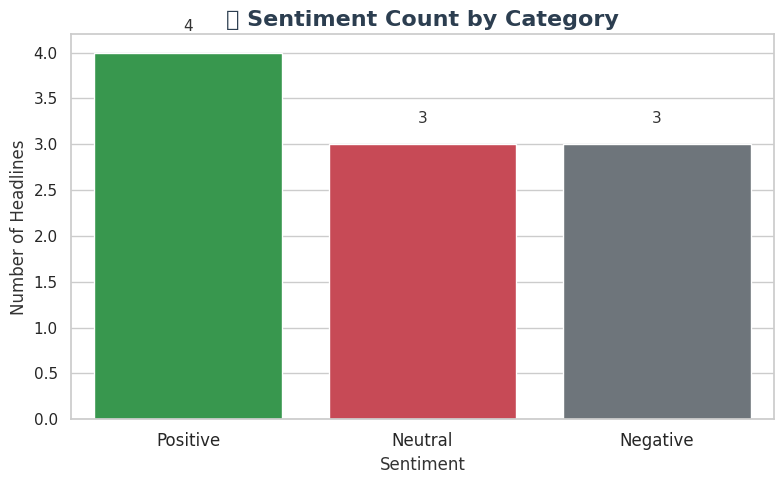

 Fetching news for: tesla
Analyzing 10 headlines using RoBERTa (very accurate)...


Device set to use cpu


,Headline,Sentiment
0,Elon Musk Trying to Figure Out Who’s to Blame ...,Neutral
1,US court won’t lift judge’s block on Trump’s g...,Neutral
2,Musk criticizes Trump’s ‘One Big Beautiful Bil...,Negative
3,Musk criticizes Trump’s ‘One Big Beautiful Bil...,Negative
4,Fastest AI Deployment in History? Enrique Abey...,Positive
5,"Tide turns on Trump: Musk out, tariffs crushed...",Negative
6,Tesla Launches Model 3 Tow Package in North Am...,Positive
7,Elon Musk Reclaims Top Spot As World’s Richest...,Positive
8,Elon Musk say it's '50/50' he'll land on Mars ...,Neutral
9,Fastest AI Deployment in History? Enrique Abey...,Positive


<ipython-input-2-340c64e72fa8>:132: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


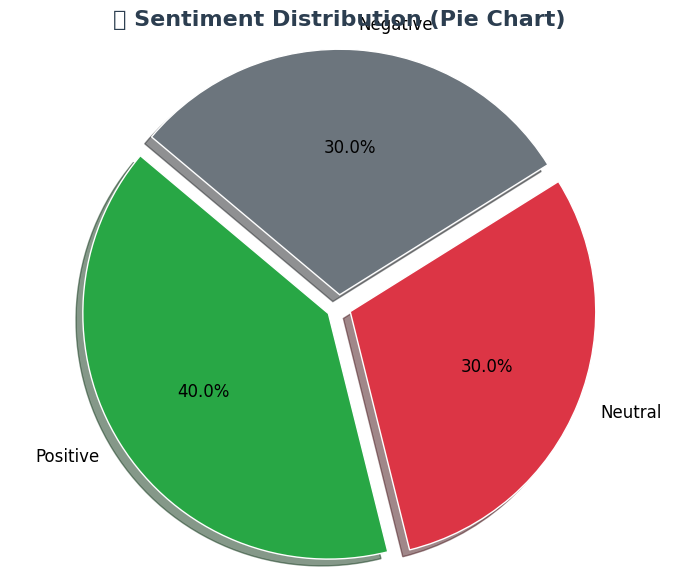

In [ ]:
# Install Required Libraries
# !pip install vaderSentiment
# !pip install transformers
# !pip install matplotlib
# !pip install vaderSentiment transformers nltk requests
# nltk.download('punkt')
# nltk.download('stopwords')

# Import Libraries
import nltk
import requests
import pandas as pd
import matplotlib.pyplot as plt



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from IPython.display import display
import ipywidgets as widgets

# Setup Text Cleaner
def clean_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return " ".join([w for w in words if w.lower() not in stop_words])

# Input Keyword
keyword_input = widgets.Text(
    value='stock market',
    placeholder='Enter a topic or keyword...',
    description='Keyword:',
    disabled=False
)
display(keyword_input)

#  Choose Model
model_dropdown = widgets.Dropdown(
    options=['VADER (fast)', 'BERT (accurate)', 'RoBERTa (very accurate)'],
    value='VADER (fast)',
    description='Model:'
)
display(model_dropdown)

graph_dropdown = widgets.Dropdown(
    options=['Pie Chart', 'Bar Chart', 'Donut Chart', 'Table View'],
    value='Pie Chart',
    description='Graph:'
)
display(graph_dropdown)


#  Fetch News Headlines (NewsData.io example)
def fetch_news(api_key, keyword):
    url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={keyword}&language=en'
    response = requests.get(url)
    data = response.json()
    if 'results' in data:
        return [article['title'] for article in data['results'][:10]]
    else:
        print(" Error fetching news:", data)
        return []

#  Run Sentiment Analysis
def analyze_sentiment(headlines, model_name):
    results = []

    if model_name == 'VADER (fast)':
        analyzer = SentimentIntensityAnalyzer()
        for headline in headlines:
            cleaned = clean_text(headline)
            score = analyzer.polarity_scores(cleaned)['compound']
            sentiment = 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral'
            results.append({'Headline': headline, 'Sentiment': sentiment})

    elif model_name == 'BERT (accurate)':
        bert_analyzer = pipeline("sentiment-analysis")
        for headline in headlines:
            result = bert_analyzer(headline)[0]
            sentiment = result['label'].capitalize()
            results.append({'Headline': headline, 'Sentiment': sentiment})

    elif model_name == 'RoBERTa (very accurate)':
        roberta_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
        for headline in headlines:
            result = roberta_analyzer(headline)[0]
            label = result['label']
            label_map = {
                'LABEL_0': 'Negative',
                'LABEL_1': 'Neutral',
                'LABEL_2': 'Positive'
            }
            sentiment = label_map.get(label, label)
            results.append({'Headline': headline, 'Sentiment': sentiment})

    return pd.DataFrame(results)

def show_graph(df, graph_type):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")

    sentiment_counts = df['Sentiment'].value_counts()
    colors = ['#28a745', '#dc3545', '#6c757d']  # Green, Red, Gray
    explode = (0.05, 0.05, 0.05)

    plt.rcParams.update({
        'text.color': '#333333',
        'axes.labelcolor': '#333333',
        'axes.edgecolor': '#cccccc',
        'axes.titlesize': 16,
        'axes.titleweight': 'bold',
        'axes.titlecolor': '#2c3e50',
        'axes.labelsize': 12,
        'figure.facecolor': 'white'
    })

    if graph_type == 'Table View':
        display(df)

    elif graph_type == 'Pie Chart':
        plt.figure(figsize=(7, 6))
        wedges, texts, autotexts = plt.pie(
            sentiment_counts,
            labels=sentiment_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            explode=explode,
            shadow=True,
            textprops={'fontsize': 12, 'color': 'black'}
        )
        plt.title("📊 Sentiment Distribution (Pie Chart)", fontsize=16)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

    elif graph_type == 'Donut Chart':
        plt.figure(figsize=(7, 6))
        wedges, texts, autotexts = plt.pie(
            sentiment_counts,
            labels=sentiment_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            explode=explode,
            shadow=True,
            textprops={'fontsize': 12, 'color': 'black'}
        )
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.title("🔘 Sentiment Distribution (Donut Chart)", fontsize=16)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

    elif graph_type == 'Bar Chart':
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(
            x=sentiment_counts.index,
            y=sentiment_counts.values,
            palette=sns.color_palette(colors)
        )
        plt.title("📊 Sentiment Count by Category", fontsize=16)
        plt.ylabel("Number of Headlines", fontsize=12)
        plt.xlabel("Sentiment", fontsize=12)
        for i, v in enumerate(sentiment_counts.values):
            ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=11)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=11)
        plt.tight_layout()
        plt.show()



#  Button to Trigger Everything
def on_button_click(b):
    keyword = keyword_input.value.strip()
    model_choice = model_dropdown.value
    api_key = "pub_61595988246c485eab2e8cb2233ddf85"  # ← Replace this with your real key


    if not keyword:
        print("Please enter a keyword.")
        return

    print(f" Fetching news for: {keyword}")
    headlines = fetch_news(api_key, keyword)

    if headlines:
        print(f"Analyzing {len(headlines)} headlines using {model_choice}...")
        df = analyze_sentiment(headlines, model_choice)
        display(df)
        show_graph(df, graph_dropdown.value)

run_button = widgets.Button(description="Run Sentiment Analysis")
run_button.on_click(on_button_click)
display(run_button)
